In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [ ]:
income_df = pd.read_csv("/content/adult.csv")
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
income_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,28855.000000,2.885500e+04,28855.000000,28854.000000,28854.000000,28854.000000
mean,38.634344,1.897565e+05,10.073575,1070.827892,88.328273,40.442608
std,13.742880,1.054501e+05,2.559413,7463.025745,403.260391,12.384877
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781090e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.384100e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)

In [ ]:
my_df = income_df.dropna()

In [ ]:
my_df['predclass'] = my_df['income']
del my_df['income']
my_df['education-num'] = my_df['educational-num']
del my_df['educational-num']
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28854 entries, 0 to 28853
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28854 non-null  float64
 1   workclass       28854 non-null  object 
 2   fnlwgt          28854 non-null  int64  
 3   education       28854 non-null  object 
 4   marital-status  28854 non-null  object 
 5   occupation      28854 non-null  object 
 6   relationship    28854 non-null  object 
 7   race            28854 non-null  object 
 8   gender          28854 non-null  object 
 9   capital-gain    28854 non-null  float64
 10  capital-loss    28854 non-null  float64
 11  hours-per-week  28854 non-null  float64
 12  native-country  28854 non-null  object 
 13  predclass       28854 non-null  object 
 14  education-num   28854 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 3.5+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Dealing with Missing Value
my_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
education-num     0
dtype: int64

Feature Engineering

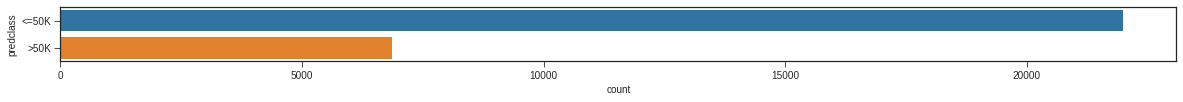

In [ ]:
#Income level less than 50K is more than 3 times of those above 50K
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

In [ ]:
# Minimizing the values of Education to Plot Graphs
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

my_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,education,education-num
2,Doctorate,16.000000
4,Masters,14.226351
0,Bachelors,13.000000
1,CommunityCollege,10.354366
3,HighGrad,9.000000
5,dropout,5.612163


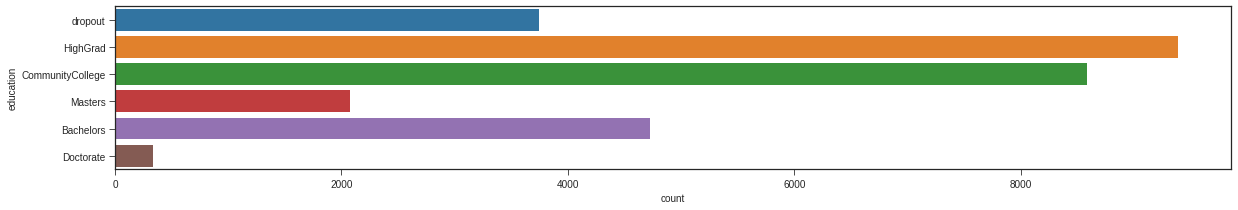

In [ ]:
# Eductional Graph
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df)

In [ ]:
# Minimizing the values of Marital-Status 
my_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


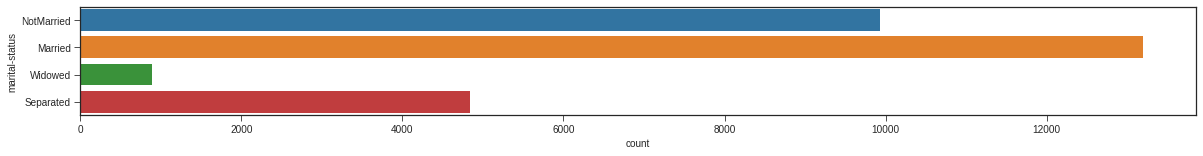

In [ ]:
# Martial-Status
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=my_df)

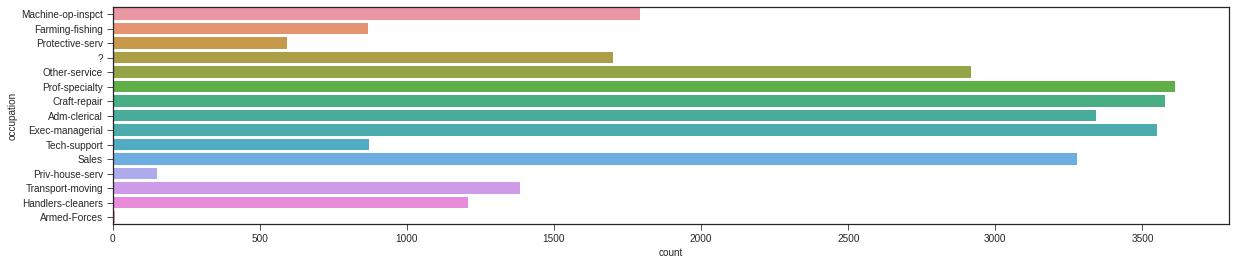

In [ ]:
# Occupation
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df)

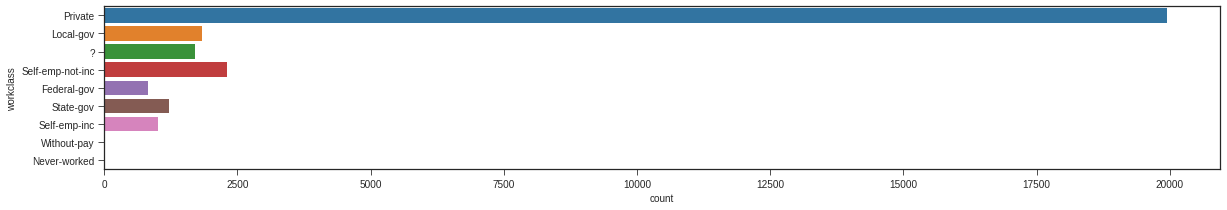

In [ ]:
#Workclass
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df)

In [ ]:
#Age 
my_df['age_bin'] = pd.cut(my_df['age'], 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


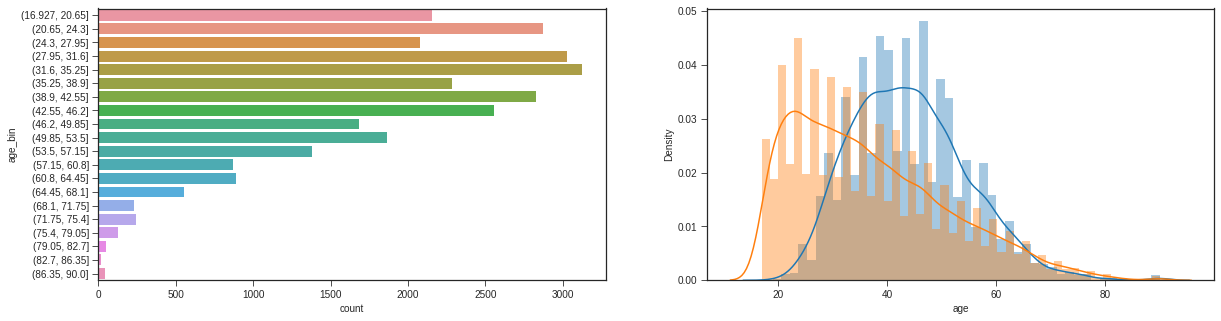

In [ ]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

In [ ]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,44.167177
0,<=50K,36.909996


<Figure size 1440x360 with 0 Axes>

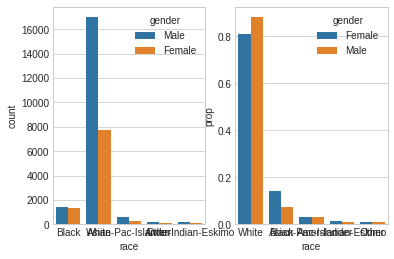

In [ ]:
# Race
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [ ]:
#    Hours of Work
my_df['hours-per-week_bin'] = pd.cut(my_df['hours-per-week'], 10)
my_df['hours-per-week'] = my_df['hours-per-week']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(20.0, 60.0)

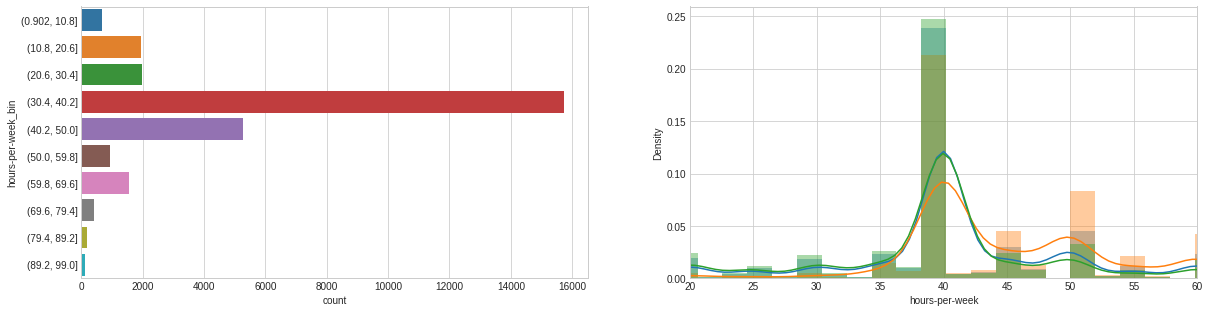

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours-per-week']);
sns.distplot(my_df[my_df['predclass'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

In [ ]:
my_df.head()


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,education-num,age_bin,hours-per-week_bin
0,25.0,Private,226802,dropout,NotMarried,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,7,"(24.3, 27.95]","(30.4, 40.2]"
1,38.0,Private,89814,HighGrad,Married,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,9,"(35.25, 38.9]","(40.2, 50.0]"
2,28.0,Local-gov,336951,CommunityCollege,Married,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,12,"(27.95, 31.6]","(30.4, 40.2]"
3,44.0,Private,160323,CommunityCollege,Married,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K,10,"(42.55, 46.2]","(30.4, 40.2]"
4,18.0,?,103497,CommunityCollege,NotMarried,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K,10,"(16.927, 20.65]","(20.6, 30.4]"


In [ ]:
# Crossing Numerical Features
my_df['age-hours'] = my_df['age']*my_df['hours-per-week']
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


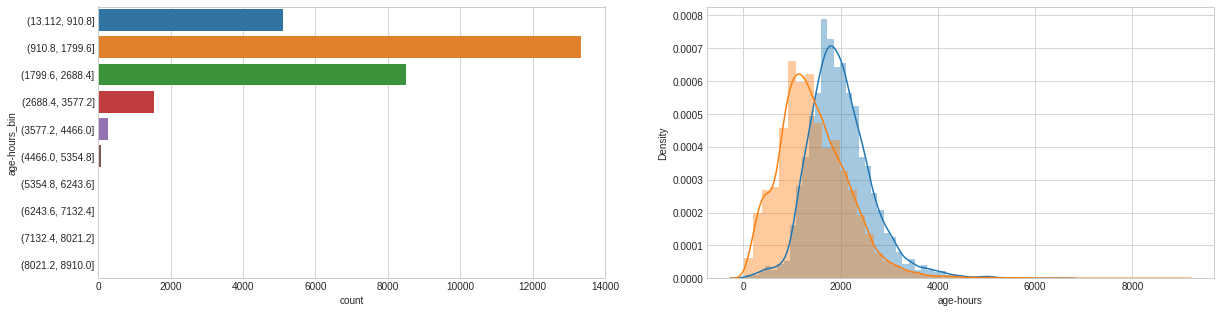

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"}) 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


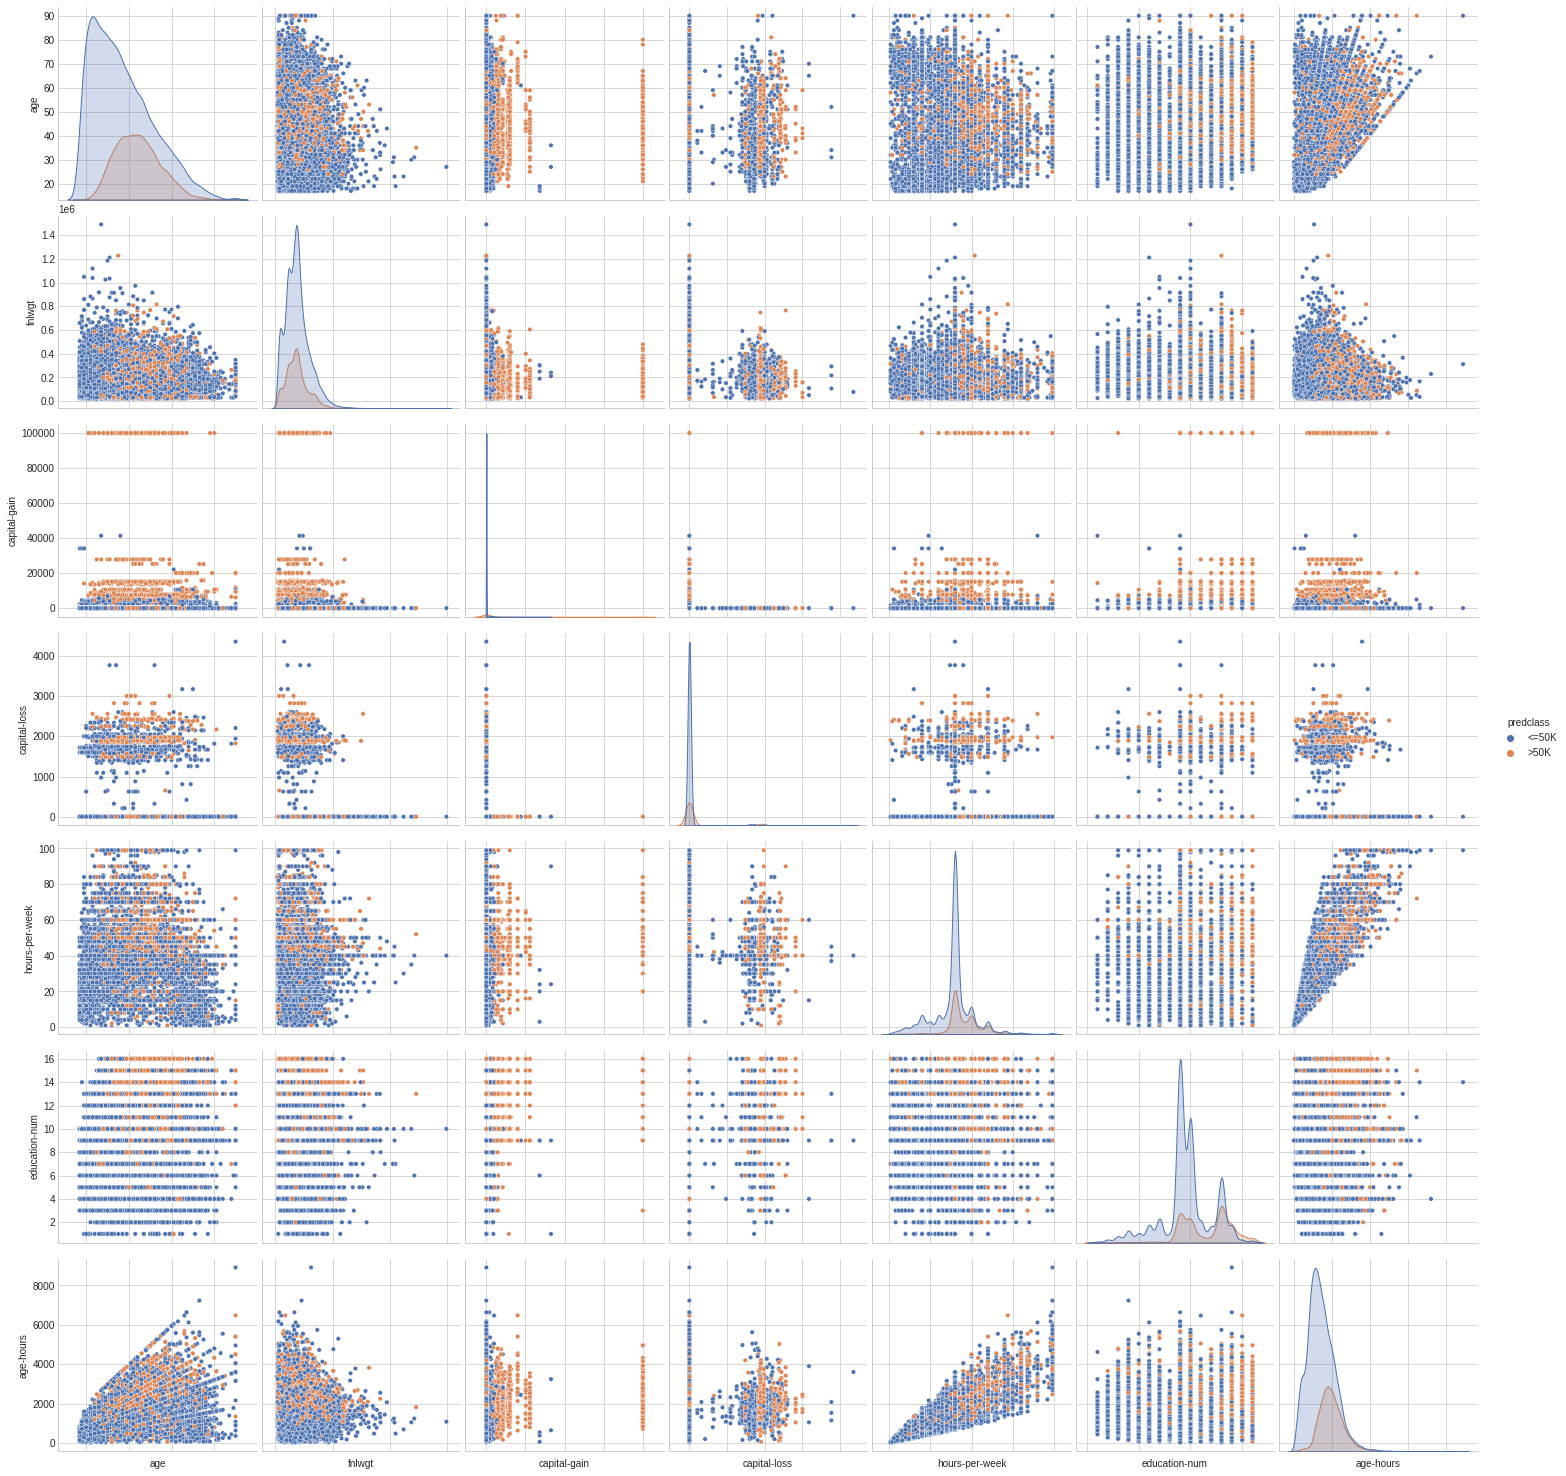

In [ ]:
#          Exploratory data analysis 
#             pair plots of entire dataset
pp = sns.pairplot(my_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

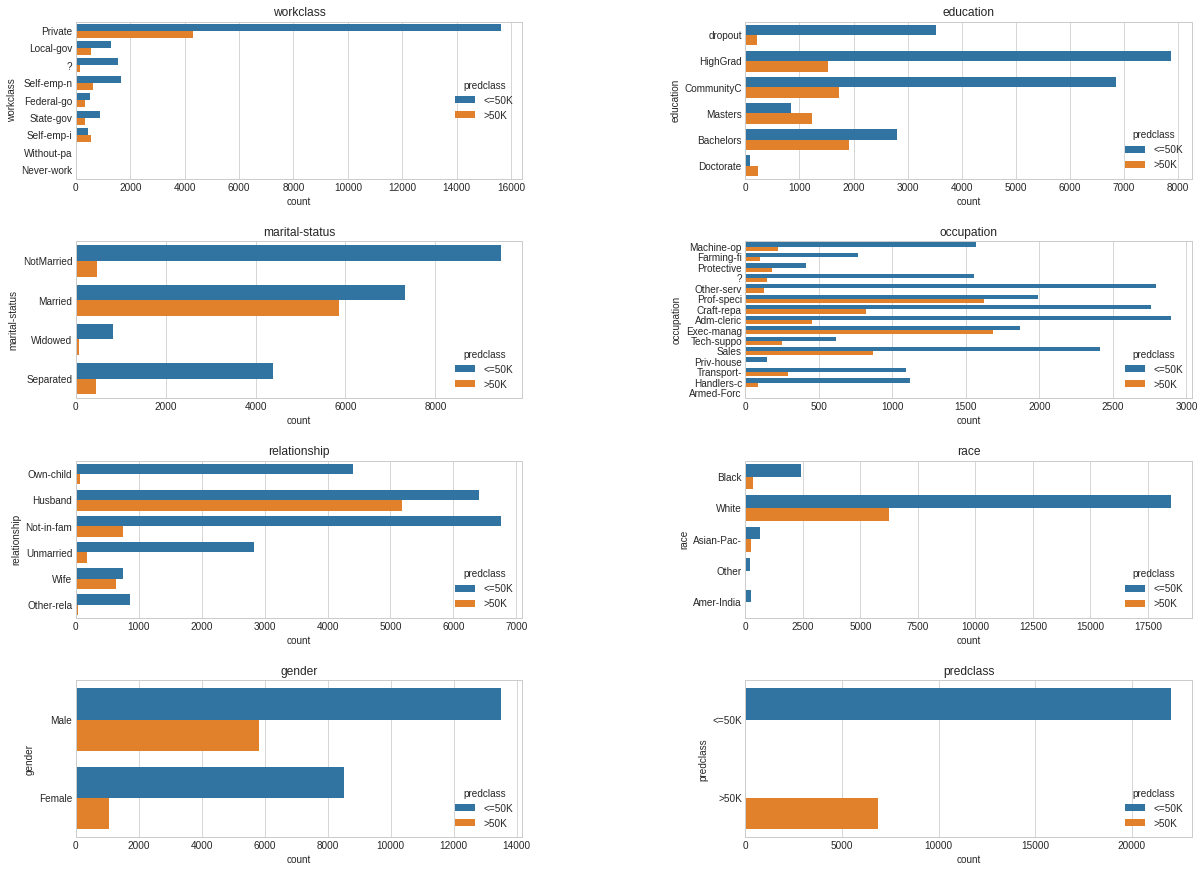

In [ ]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = my_df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'gender','predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)  

MACHINE LEARNING MODELS

In [ ]:
#importing all the required ML packages  
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,education-num,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,8,4,13699,5,1,7,3,2,1,0,0,39,38,0,6,2,3,414,1
1,21,4,2971,3,0,5,0,4,1,0,0,49,38,0,8,5,4,733,2
2,11,2,17808,1,0,11,0,4,1,0,0,39,38,1,11,3,3,463,1
3,27,4,7935,1,0,7,0,2,1,95,0,39,38,1,9,7,3,685,1
4,1,0,3812,1,1,0,3,4,0,0,0,29,38,0,9,0,2,240,0


In [ ]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,education-num,age-hours
0,8,4,13699,1,7,3,2,1,0,0,39,6,414
1,21,4,2971,0,5,0,4,1,0,0,49,8,733
2,11,2,17808,0,11,0,4,1,0,0,39,11,463
3,27,4,7935,0,7,0,2,1,95,0,39,9,685
4,1,0,3812,1,0,3,4,0,0,0,29,9,240


In [ ]:
#Spliting the data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Principal Component Analysis (PCA)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

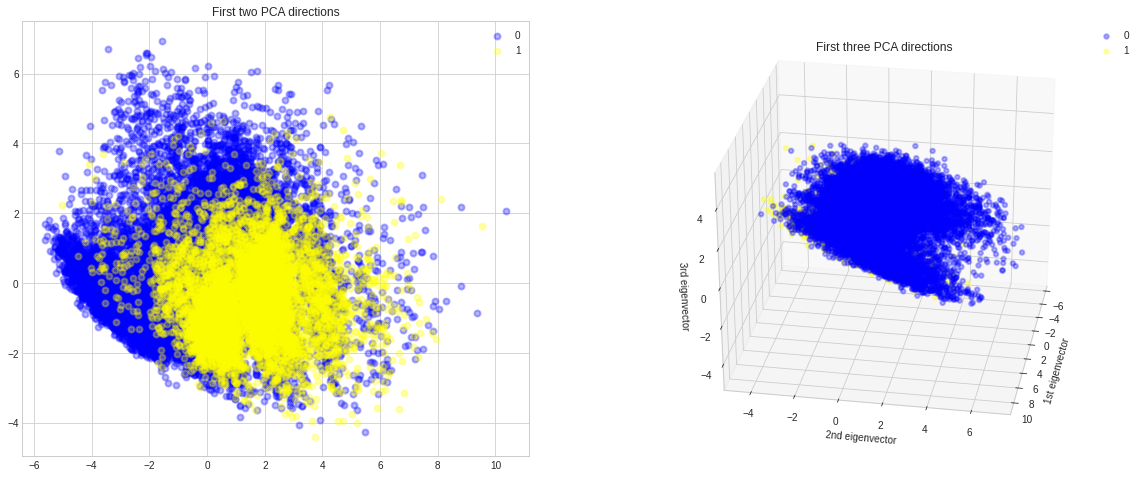

In [ ]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(my_df.drop('predclass', axis=1))
X = std_scale.transform(my_df.drop('predclass', axis=1))
y = my_df['predclass']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.21278516, 0.3279826 , 0.42535588, 0.50862544, 0.58791521,
       0.66596094, 0.74065055, 0.80983392, 0.86939542, 0.92443694,
       0.96778231, 0.99790074, 1.        ])

Classification Models

In [ ]:
  # Gaussian Naive Bayes
  gaussian = GaussianNB()
  gaussian.fit(X_train, y_train)
  # y_pred = gaussian.predict(X_test)
  score_gaussian = gaussian.score(X_test,y_test)
  print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8286258880609946


In [ ]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.7679778201351586


In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8275862068965517


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8622422457113152


In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.7617397331485011


In [ ]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Logistic Regression','KNN','Random Forest']
models=[GaussianNB(), svm.SVC(kernel='linear'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,CV Mean,Std
Naive Bayes,0.804845,0.005337
Linear Svm,0.840715,0.005909
Logistic Regression,0.838601,0.005572
KNN,0.839190,0.006766
Random Forest,0.849380,0.005424


The most accurate model is **Random** **Forest**